In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math, random, requests, io
%matplotlib inline


In [2]:
import sys
!{sys.executable} -m pip install ipyleaflet
!{sys.executable} -m pip install ipywidgets

In [3]:
!jupyter nbextension enable --py --sys-prefix ipyleaflet
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-leaflet/extension...
      - Validating: ok
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [4]:
from ipyleaflet import (
    Map, basemaps, basemap_to_tiles, Circle, 
    Marker, FullScreenControl, LayersControl, 
    LayerGroup, CircleMarker
)
# After importing, refresh the page to show the maps

In [5]:
# https://blog.jupyter.org/interactive-gis-in-jupyter-with-ipyleaflet-52f9657fa7a
center = (0, 0)
zoom=1

map_ = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=center, zoom=zoom)
map_.add_control(FullScreenControl())
map_.add_control(LayersControl())
display(map_)
# If the map does not show below, then you may need to refresh the browswer and run it again

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [6]:
map_.interact(zoom=(1,10,1))

Box(children=(IntSlider(value=1, description='zoom', max=10, min=1),))

## Loading the data

In [7]:
# Needed for when editing external modules
%load_ext autoreload
%autoreload
from datasetmanager import CovidManager

covid_manager = CovidManager()

datasets = covid_manager.getDatasets()

print(datasets)

{'covid_confirmed':                 Province/State         Country/Region        Lat       Long  \
0                          NaN            Afghanistan  33.000000  65.000000   
1                          NaN                Albania  41.153300  20.168300   
2                          NaN                Algeria  28.033900   1.659600   
3                          NaN                Andorra  42.506300   1.521800   
4                          NaN                 Angola -11.202700  17.873900   
..                         ...                    ...        ...        ...   
259  Saint Pierre and Miquelon                 France  46.885200 -56.315900   
260                        NaN            South Sudan   6.877000  31.307000   
261                        NaN         Western Sahara  24.215500 -12.885800   
262                        NaN  Sao Tome and Principe   0.186360   6.613081   
263                        NaN                  Yemen  15.552727  48.516388   

     1/22/20  1/23/20  1/24/20 

## Data analysis
A simple exploration of the data.

In [8]:
# Shows the dataset for deaths in the US
datasets['covid_us_deaths']

,UID,iso2,iso3,code3,FIPS,County,Province/State,Country/Region,Lat,Long,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0.0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,5,5,5,5,5,5,5,5,5,5.0
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,2,2,2,2,2,2,2,2,2,2.0
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,51,56,58,60,62,63,64,63,69,77.0
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,1,1,2,3,3,3,3,3,3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,84070016.0,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,0,0,0,0,0,0,0,0,0,0.0
3151,84070017.0,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,0,0,0,0,0,0,0,0,0,0.0
3152,84070018.0,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,0,0,0,0,1,1,1,1,1,1.0
3153,84070019.0,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,0,0,0,0,0,0,0,0,0,0.0


In [9]:
# Dataset for the number of confirmed cases
datasets['covid_confirmed'].head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,784,840,906,933,996,1026,1092,1176,1279,1351
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,494,518,539,548,562,584,609,634,663,678
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,673,673,696,704,713,717,717,723,723,731
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,24,24,24,24,25,25,25
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,23,23,23,23,23,23,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,2443,2571,2669,2758,2839,2941,3031,3144,3435,3607
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1111,1159,1201,1248,1291,1339,1401,1473,1523,1596
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,103,103,103,103,103,104,104,104,104,105
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2886,2897,2926,2936,2957,2963,2969,2971,2976,2982


In [10]:
# Outputs the number of days since the first recorded confirmed date
number_of_days = len(datasets['covid_confirmed'].count(axis='rows')) - 4
print("Number of days since first recorded confirmed case:", number_of_days)

Number of days since first recorded confirmed case: 94


The below block will find the latest date and create a dataset that only contains the current number of confirmed cases for each country + state/region

In [11]:
latest_date = datasets['covid_confirmed'].columns[-1] # number of confirmed cases to date
print("Latest date: ", latest_date)
df = datasets['covid_confirmed'].head(265)[['Country/Region', 'Province/State', 'Lat', 'Long', latest_date]]
df 

Latest date:  4/24/20


,Country/Region,Province/State,Lat,Long,4/24/20
0,Afghanistan,NaN,33.000000,65.000000,1351
1,Albania,NaN,41.153300,20.168300,678
2,Algeria,NaN,28.033900,1.659600,3127
3,Andorra,NaN,42.506300,1.521800,731
4,Angola,NaN,-11.202700,17.873900,25
...,...,...,...,...,...
259,France,Saint Pierre and Miquelon,46.885200,-56.315900,1
260,South Sudan,NaN,6.877000,31.307000,5
261,Western Sahara,NaN,24.215500,-12.885800,6
262,Sao Tome and Principe,NaN,0.186360,6.613081,4


Below will show the countries ordered by the number of cases. The US has significantly more (x4 at the time) cases they Spain.

In [12]:
df.sort_values(latest_date, ascending=False)

,Country/Region,Province/State,Lat,Long,4/24/20
225,US,NaN,37.0902,-95.7129,905358
201,Spain,NaN,40.0000,-4.0000,219764
137,Italy,NaN,43.0000,12.0000,192994
116,France,NaN,46.2276,2.2137,158636
120,Germany,NaN,51.0000,9.0000,154999
...,...,...,...,...,...
78,China,Tibet,31.6927,88.0924,1
238,Canada,Recovered,0.0000,0.0000,0
231,Canada,Diamond Princess,0.0000,0.0000,0
37,Canada,Grand Princess,37.6489,-122.6655,-1


In [13]:
# Finding the histogram of cases in Australia, confirmed, recovered and deaths
ausCC = df.loc[df['Country/Region'] == 'Australia'] # confirmed cases
ausRD = datasets['covid_deaths'][['Province/State', latest_date]].loc[df['Country/Region'] == 'Australia'] # recorded deaths
ausRR = datasets['covid_recovered'][['Province/State', latest_date]].loc[df['Country/Region'] == 'Australia'] # rec. recovery

# Rename the confirmed cases
ausCC = ausCC.rename(columns={latest_date: "CC"})
ausRD = ausRD.rename(columns={latest_date: "RD"})
ausRR = ausRR.rename(columns={latest_date: "RR"})

# Merge the tables together
ausMerged = pd.merge(ausCC, ausRD, on='Province/State')
ausMerged = pd.merge(ausMerged, ausRR, on='Province/State')
ausMerged = ausMerged.sort_values('CC')
ausMerged

,Country/Region,Province/State,Lat,Long,CC,RD,RR
2,Australia,Northern Territory,-12.4634,130.8456,28,0,9
0,Australia,Australian Capital Territory,-35.4735,149.0124,105,3,88
5,Australia,Tasmania,-41.4545,145.9707,207,9,67
4,Australia,South Australia,-34.9285,138.6007,438,4,331
7,Australia,Western Australia,-31.9505,115.8605,548,8,340
3,Australia,Queensland,-28.0167,153.4000,1026,6,738
6,Australia,Victoria,-37.8136,144.9631,1343,16,1172
1,Australia,New South Wales,-33.8688,151.2093,2982,33,1379


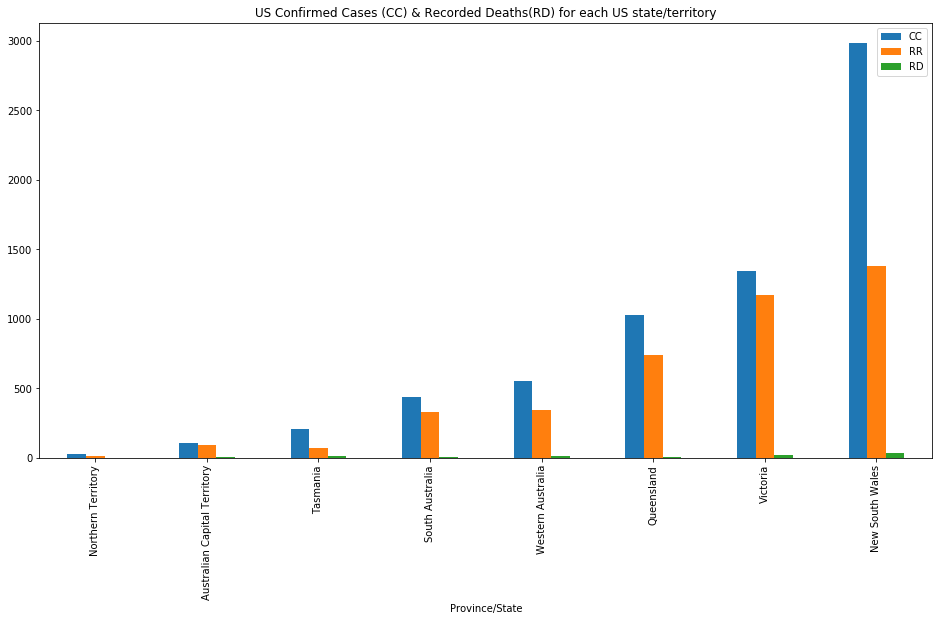

In [14]:
# Shows the bar graph for each state
title = 'US Confirmed Cases (CC) & Recorded Deaths(RD) for each US state/territory'
ausMerged.plot.bar(x='Province/State', y=['CC', 'RR', 'RD'], figsize=(16, 8), title=title)

In [15]:
datasets['covid_us_deaths']

,UID,iso2,iso3,code3,FIPS,County,Province/State,Country/Region,Lat,Long,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0.0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,5,5,5,5,5,5,5,5,5,5.0
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,2,2,2,2,2,2,2,2,2,2.0
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,51,56,58,60,62,63,64,63,69,77.0
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,1,1,2,3,3,3,3,3,3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,84070016.0,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,0,0,0,0,0,0,0,0,0,0.0
3151,84070017.0,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,0,0,0,0,0,0,0,0,0,0.0
3152,84070018.0,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,0,0,0,0,1,1,1,1,1,1.0
3153,84070019.0,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,0,0,0,0,0,0,0,0,0,0.0


### US bar graphs

In [16]:
# Finding the histogram of cases in Australia, confirmed, recovered and deaths
usCC = datasets['covid_us_confirmed'][['Province/State', latest_date]].groupby(['Province/State']).sum() # confirmed cases
usRD = datasets['covid_us_deaths'][['Province/State', latest_date]].groupby(['Province/State']).sum() # Recorded deaths

# Rename the confirmed cases
usCC = usCC.rename(columns={latest_date: "CC"}).reset_index()
usRD = usRD.rename(columns={latest_date: "RD"}).reset_index()

# Merge the tables together
usMerged = pd.merge(usCC, usRD, on='Province/State')
usMerged = usMerged.sort_values('CC')
usMerged

,Province/State,CC,RD
2,American Samoa,0,0.0
37,Northern Mariana Islands,14,2.0
50,Virgin Islands,54,3.0
12,Guam,141,5.0
1,Alaska,339,5.0
28,Montana,444,14.0
55,Wyoming,473,1.0
13,Hawaii,595,13.0
36,North Dakota,748,15.0
49,Vermont,824,44.0


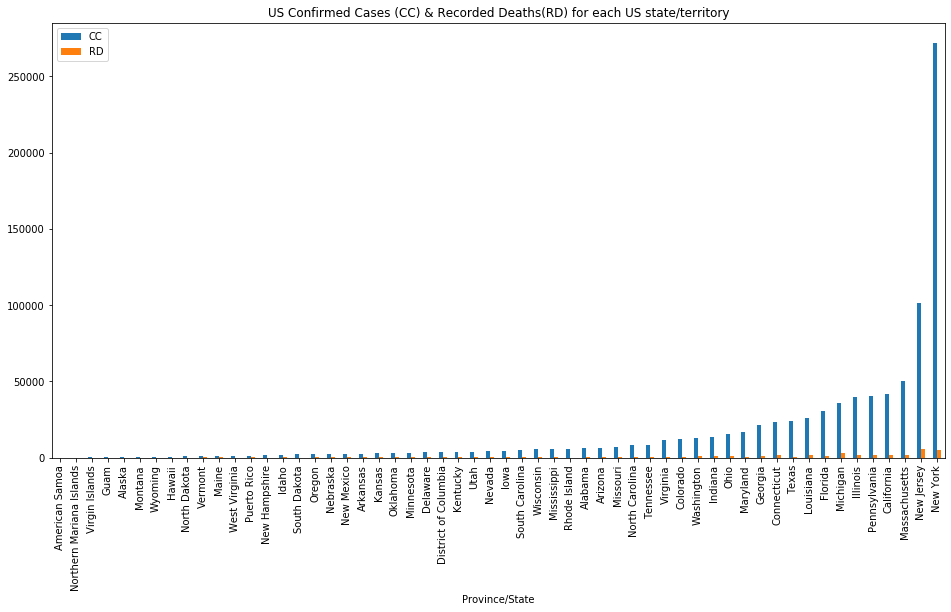

In [17]:
title = 'US Confirmed Cases (CC) & Recorded Deaths(RD) for each US state/territory'
usMerged.plot.bar(x='Province/State', y=['CC', 'RD'], figsize=(16, 8), title=title)

# Maps

In [18]:
# This function generates a graph given the dataframe
# df - dataframe containing the data, pymap - map to be given to, 
# G - graph, scale - scale of the number of cases
# output - circle_layer - to delete this later
def generateGraph(df, pymap, G, date, scale=1):
    marker_layer = LayerGroup(name='markers')
    circle_layer = LayerGroup(name='circles')
    pos = {}
    
    for index, row in df.iterrows():
        coords = (row['Lat'], row['Long'])
        name = row['Country/Region']

        # Adds the state or province if the point has one
        if not pd.isnull(row['Province/State']):
            name += ' - ' + row['Province/State']
            
        # Add number of cases in the title
        name += ' - Confirmed:' + str(row[date])
            
        # Adds the nodes to the graph
        if None != G:
            pos[name] = coords # Add to pos dict for drawing
            G.add_node(name, pos=coords) 
        
        # Marker
        if (row[date] > 0):
            marker = Marker(location=coords, draggable=False, title=name, opacity=0.1)
            marker_layer.add_layer(marker)
            #pymap.add_layer(marker)
        
        # Circle
        if (row[date] > 0):
            circle = Circle(location=coords, radius=round(row[date]*scale), color='red', fill_color='red')
            circle_layer.add_layer(circle)
            #pymap.add_layer(circle)
        
    pymap.add_layer(marker_layer)
    pymap.add_layer(circle_layer)

In [19]:
# Generate map for the confirmed cases
confirmedCasesGraph = nx.Graph()

confirmedMap = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=center, zoom=zoom)
confirmedMap.add_control(FullScreenControl())


generateGraph(df, confirmedMap, confirmedCasesGraph, latest_date, 1.2)
confirmedMap.add_control(LayersControl())

In [20]:
confirmedMap

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In this map you can see the dots represent the number of confirmed cases with the circle's radius representing the number of cases. The larger the circle, the higher number of cases the country/state/provice has.

### Australia
Below will show only Australia's Cases

In [21]:
# Create a separate dataframe for australian cities
ausCities = df.loc[df['Country/Region'] == 'Australia']
ausCities

,Country/Region,Province/State,Lat,Long,4/24/20
8,Australia,Australian Capital Territory,-35.4735,149.0124,105
9,Australia,New South Wales,-33.8688,151.2093,2982
10,Australia,Northern Territory,-12.4634,130.8456,28
11,Australia,Queensland,-28.0167,153.4000,1026
12,Australia,South Australia,-34.9285,138.6007,438
13,Australia,Tasmania,-41.4545,145.9707,207
14,Australia,Victoria,-37.8136,144.9631,1343
15,Australia,Western Australia,-31.9505,115.8605,548


In [22]:
ausGraph = nx.Graph()

ausMap = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=(-28, 138), zoom=4)
ausMap.add_control(FullScreenControl())
ausMap.add_control(LayersControl())

generateGraph(ausCities, ausMap, ausGraph, latest_date, 50)
display(ausMap)

Map(center=[-28, 138], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [23]:
ausMap.interact(zoom=(1,10,1))

Box(children=(IntSlider(value=4, description='zoom', max=10, min=1),))

## Timeline
Below will show code to show the progression of cases in Australia with time.

In [24]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [25]:
dfaus = datasets['covid_confirmed'].loc[df['Country/Region'] == 'Australia']
ausMapTimeline = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=(-28, 138), zoom=4)
ausMapTimeline.add_control(FullScreenControl())
ausMapTimeline.add_control(LayersControl())

circle_layer_aus = LayerGroup(name='circles')
marker_layer_aus = LayerGroup(name='markers')

In [26]:
# This function generates a graph given the dataframe, this is optimized for the timeline display
# df - dataframe containing the data, pymap - map to be given to, scale - scale of the number of cases (circle size)
# output - circle_layer - to delete this later
def generateGraphTimeline(df, pymap, date, circle_layer_aus, marker_layer_aus, showMarkers, scale=1):
    for index, row in df.iterrows():
        coords = (row['Lat'], row['Long'])
        
        # Everything to do with markers, can be selected to be off
        if showMarkers:
            name = row['Country/Region']

            # Adds the state or province if the point has one
            if not pd.isnull(row['Province/State']):
                name += ' - ' + row['Province/State']

            # Add number of cases in the title
            name += ' - Confirmed: ' + str(row[date])

            # Marker
            marker = Marker(location=coords, draggable=False, title=name, opacity=0.1)
            marker_layer_aus.add_layer(marker)
        
        # Circle
        if (row[date] > 0):
            circle = CircleMarker(location=coords, radius=round(row[date]*scale), color='red', fill_color='red')
            circle_layer_aus.add_layer(circle)
            
    pymap.add_layer(circle_layer_aus)
    if showMarkers:
        marker_layer_aus.name = 'markers'
        pymap.add_layer(marker_layer_aus)

In [27]:
def f(date, showMarkers):
    # Gets the data from the selected date
    date = dfaus.columns[date+3] # number of confirmed cases to date
    ausCities = dfaus[['Country/Region', 'Province/State', 'Lat', 'Long', date]]
    
    # Removes the old circle/marker layer
    if circle_layer_aus in ausMapTimeline.layers:
        ausMapTimeline.remove_layer(circle_layer_aus)
        circle_layer_aus.clear_layers()
    
    if marker_layer_aus in ausMapTimeline.layers:
        ausMapTimeline.remove_layer(marker_layer_aus)
        marker_layer_aus.clear_layers()
    
    # Generates and adds the new layer
    generateGraphTimeline(ausCities, ausMapTimeline, date, circle_layer_aus, marker_layer_aus, showMarkers, 0.02)

    return date

### Timeline Map

In [28]:
display(ausMapTimeline)

Map(center=[-28, 138], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [29]:
# Slider: days since first confirmed case
interact(f, date=(1, number_of_days), showMarkers=widgets.Checkbox());

'3/8/20'

Usage of map above: Move the slider to see the number of confirmed cases represented with the radius of the circle with respect to time. Move the slider to the very right to see the latest number of cases. You can select to show markers which will show the number of confirmed cases when you hover your mouse over the marker.

## Resources
Resources that were useful.

Layers Control:
* Documentation: https://ipyleaflet.readthedocs.io/en/latest/api_reference/layers_control.html
* Layers Control naming: https://github.com/jupyter-widgets/ipyleaflet/issues/293